In [1]:
import pickle
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.__version__

!sudo pip3 install keras
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D



In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
drive.mount('/drive')
uploaded = '/drive/My Drive/CS286/cs286_project_lung cancer/processed_data.pkl'

Mounted at /drive


# Reading data

labels: 0-LUSC(lung squamous cell carcinoma), 1-LUAD(lung adenocarcinoma)

In [3]:
with open(uploaded, 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict.keys())
print(loaded_dict['copy_number_matrix'].shape, '\n', loaded_dict['copy_number_matrix'])
# print(len(loaded_dict['labels']), '\n', loaded_dict['labels'])
# print(len(loaded_dict['patient_ids']), '\n', loaded_dict['patient_ids'])
# print(len(loaded_dict['gene_ids']),'\n', loaded_dict['gene_ids'])

dict_keys(['copy_number_matrix', 'patient_ids', 'labels', 'gene_ids'])
(1058, 60623) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Split training set and testing set

In [ ]:
import collections

X_copy_number = loaded_dict['copy_number_matrix']
y_label = loaded_dict['labels']
y_label = np.asarray(y_label).reshape((-1,1))
print(X_copy_number)
collections.Counter(y_label.T[0])
df_data = pd.DataFrame(X_copy_number)
df_data.iloc[:, :-600]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,0,1,2,3,4,5,6,7,8,9,...,60013,60014,60015,60016,60017,60018,60019,60020,60021,60022
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
# training 80%, tesing 20%
X_train, X_test, y_train, y_test = train_test_split(X_copy_number, 
                                                    y_label, 
                                                    test_size = 0.20)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(846, 60623) (212, 60623)
(846, 1) (212, 1)


In [ ]:
X_train = X_train.reshape(len(X_train), len(X_train[0]), 1)
X_test = X_test.reshape(len(X_test), len(X_test[0]), 1)
print(X_train.shape, X_test.shape)

(846, 60623, 1) (212, 60623, 1)


# Build Model

In [ ]:
def CNN():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=12,
                  activation='relu',
                  input_shape=(X_train.shape[1], 1)))
  model.add(MaxPooling1D(pool_size=4))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv1D(filters=64, kernel_size=12,
                  activation='relu'))
  model.add(MaxPooling1D(pool_size=8))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  return model

In [ ]:
opt = Adam(learning_rate=1e-5)
model = CNN()
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt,               
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 60612, 32)         416       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15153, 32)        0         
 1D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 15153, 32)        128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 15153, 32)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 15142, 64)         24640     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1892, 64)        

In [ ]:
# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.25)


Epoch 1/100
20/20 [==============================] - 3s 125ms/step - loss: 0.8850 - accuracy: 0.6404 - val_loss: 0.5462 - val_accuracy: 0.8113
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 0.5626 - accuracy: 0.7808 - val_loss: 0.4928 - val_accuracy: 0.8208
Epoch 3/100
20/20 [==============================] - 2s 110ms/step - loss: 0.3544 - accuracy: 0.8407 - val_loss: 0.5036 - val_accuracy: 0.8066
Epoch 4/100
20/20 [==============================] - 2s 107ms/step - loss: 0.3848 - accuracy: 0.8470 - val_loss: 0.4536 - val_accuracy: 0.8726
Epoch 5/100
20/20 [==============================] - 2s 105ms/step - loss: 0.3273 - accuracy: 0.8675 - val_loss: 0.4365 - val_accuracy: 0.8774
Epoch 6/100
20/20 [==============================] - 2s 109ms/step - loss: 0.3091 - accuracy: 0.8849 - val_loss: 0.4250 - val_accuracy: 0.8632
Epoch 7/100
20/20 [==============================] - 2s 109ms/step - loss: 0.2619 - accuracy: 0.8943 - val_loss: 0.4005 - val_accuracy: 0.8679

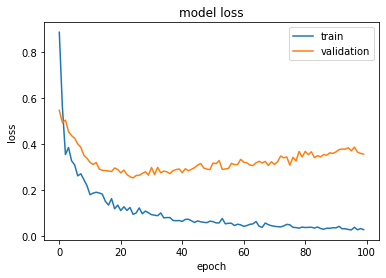

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

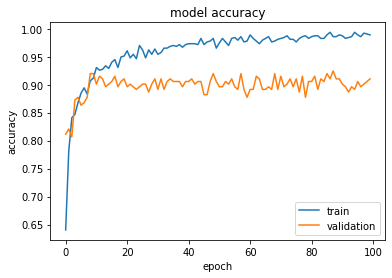

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix
import collections

y_pred = model.predict(X_test)
print(y_pred.round().T)
print(y_test.T)
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
print(collections.Counter(y_pred.round().T[0]))
print(collections.Counter(y_test.T[0]))
result = model.evaluate(X_test, y_test)
print('loss:', result[0], 'accuracy:', result[1])

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
  0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
  1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
  1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
  0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
  0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.]]
[[0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1
  0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
  1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
  1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1
  0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 

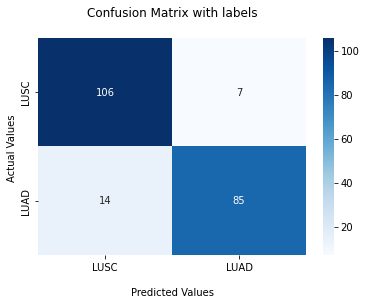

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['LUSC','LUAD'])
ax.yaxis.set_ticklabels(['LUSC','LUAD'])

## Display the visualization of the Confusion Matrix.
plt.show()